In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
sumo = pd.read_csv('data.csv')
sumo.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


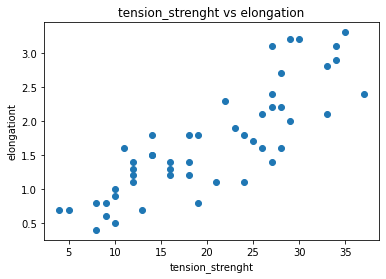

<Figure size 1440x1800 with 0 Axes>

In [3]:
plt.subplot(1,1,1)
plt.title("tension_strenght vs elongation")
plt.scatter(x=sumo.tension_strenght,y=sumo.elongation)
plt.xlabel('tension_strenght')
plt.ylabel('elongationt')
plt.figure(figsize=(20,25))
plt.show()

In [4]:
target=[]
for i in sumo['elongation']:
    if i<=1 :
        target.append('0')
    elif i>1 and i<=2 :
        target.append('1')
    elif i>2 :
        target.append('2')
        
sumo['Target']=target    

In [5]:
sumo.drop('infill_pattern',inplace=True,axis=1)

In [6]:
sumo.drop('material',inplace=True,axis=1)

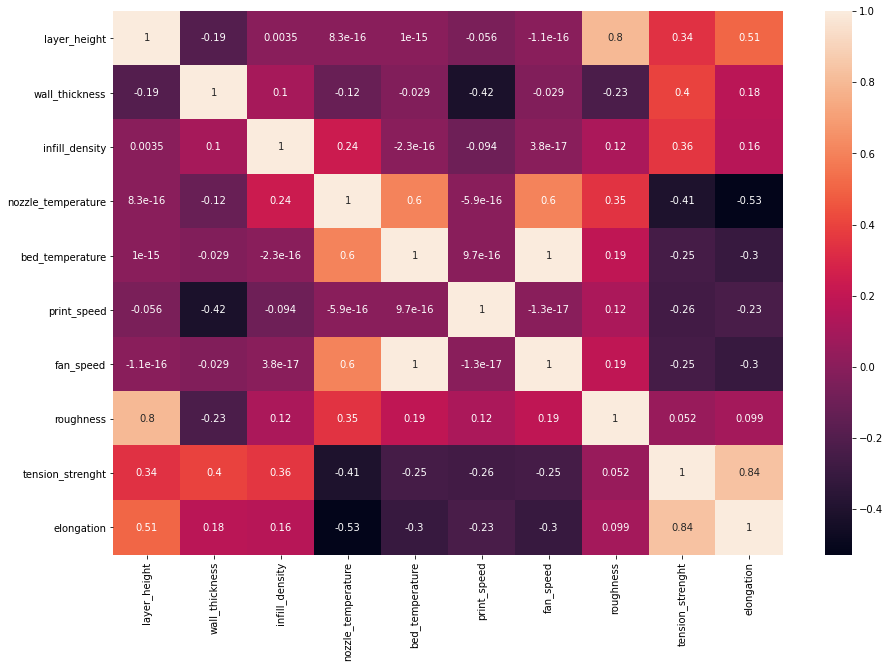

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(sumo.corr(),annot=True)
plt.show()

In [19]:
X = sumo.drop('Target',axis=1)
y = sumo.Target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [20]:
model = LinearRegression()
scores = cross_val_score(model,X_train,y_train,cv=5)
print(scores)

[0.81169193 0.57338662 0.19377538 0.8607342  0.71220457]


In [21]:
model=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [22]:
r2 = r2_score(y_pred,y_test)

print("r2 score :",r2)

r2 score : 0.8784391649029444


In [23]:
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [24]:
model1 = make_pipeline(StandardScaler(),LinearRegression())
model1.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [25]:
model1.score(X_test,y_test)

0.9110731570949127

In [26]:
model2 = make_pipeline(StandardScaler(),RandomForestRegressor())
model2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [27]:
model2.score(X_test,y_test)

0.9990153846153846